In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/ayushlodha/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# training_data features
data_features = pd.read_csv("train_logs.csv")
data_features.head()

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1


In [3]:
data_features.shape

(8405898, 11)

In [4]:
#training_data scores
data_scores = pd.read_csv("train_scores.csv")
data_scores.head()

,id,score
0,001519c8,3.5
1,0022f953,3.5
2,0042269b,6.0
3,0059420b,2.0
4,0075873a,4.0


In [5]:
data_scores.shape

(2471, 2)

In [6]:
# no of the people tested
len(data_scores)

2471

In [7]:
data_features[['id','event_id']]

,id,event_id
0,001519c8,1
1,001519c8,2
2,001519c8,3
3,001519c8,4
4,001519c8,5
...,...,...
8405893,fff05981,3615
8405894,fff05981,3616
8405895,fff05981,3617
8405896,fff05981,3618


In [8]:
event_counts = data_features[['id','event_id']].groupby('id').size().reset_index(name='event_count')

In [9]:
# Merging the event_counts with the data_scores DataFrame on the 'id' column
merged_data = pd.merge(data_scores, event_counts, on='id', how='left')

In [10]:
merged_data.describe()

,score,event_count
count,2471.000000,2471.000000
mean,3.711251,3401.820316
std,1.024937,1578.850387
min,0.500000,262.000000
25%,3.000000,2193.500000
50%,4.000000,3082.000000
75%,4.500000,4301.000000
max,6.000000,12876.000000


In [11]:
data_features.isnull().sum(), data_scores.isnull().sum(), merged_data.isnull().sum()

(id                 0
 event_id           0
 down_time          0
 up_time            0
 action_time        0
 activity           0
 down_event         0
 up_event           0
 text_change        0
 cursor_position    0
 word_count         0
 dtype: int64,
 id       0
 score    0
 dtype: int64,
 id             0
 score          0
 event_count    0
 dtype: int64)

array([[<AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'event_count'}>]], dtype=object)

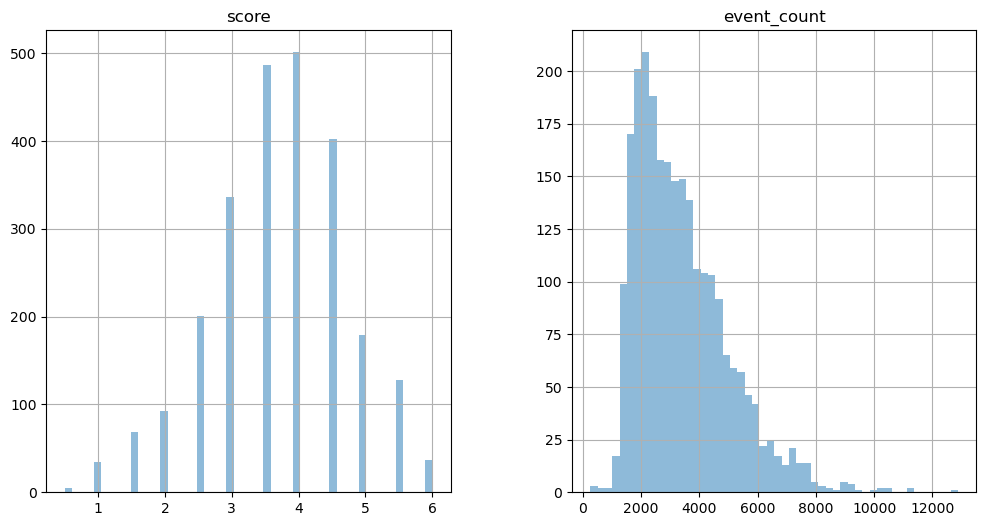

In [12]:
merged_data.hist(bins=50, alpha=0.5, label='Scores', figsize=(12,6))

In [13]:
data = pd.merge(data_features, data_scores, on='id', how='left')

In [14]:
data.head()

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count,score
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0,3.5
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0,3.5
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0,3.5
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1,3.5
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1,3.5


In [15]:
numerical_features = ['down_time','up_time','action_time','cursor_position','word_count','score']

In [16]:
data[numerical_features].corr()

,down_time,up_time,action_time,cursor_position,word_count,score
down_time,1.000000,1.000000,-0.009286,0.604293,0.666936,0.004175
up_time,1.000000,1.000000,-0.008794,0.604291,0.666935,0.004171
action_time,-0.009286,-0.008794,1.000000,-0.008629,-0.007950,-0.006641
cursor_position,0.604293,0.604291,-0.008629,1.000000,0.911395,0.324868
word_count,0.666936,0.666935,-0.007950,0.911395,1.000000,0.329669
score,0.004175,0.004171,-0.006641,0.324868,0.329669,1.000000


# Dataset Feature Classification

## Numerical Features:

- `down_time`: Appears to be a timestamp or a time-related number (continuous).
- `up_time`: Similar to `down_time`, also a timestamp or time-related number (continuous).
- `action_time`: This seems to be the duration or difference between `up_time` and `down_time` (continuous).
- `cursor_position`: Likely a position index which is a discrete numeric value.
- `word_count`: Count of words which is a discrete numeric value.

## Categorical Features:

- `id`: Even though this is numeric in appearance, it likely represents an identifier and should be treated as categorical.
- `event_id`: This is a numeric value but seems to represent an identifier for different events, hence categorical.
- `activity`: Text label describing the type of activity, clearly categorical.
- `down_event`: Describes an event type, categorical.
- `up_event`: Describes an event type, categorical.
- `text_change`: Indicates if there was a change in text, categorical.


In [17]:
data['id'] = data['id'].astype('category')
data['event_id'] = data['event_id'].astype('category')

In [18]:
import pandas as pd

# Assuming your data is in a Pandas DataFrame called `data`
numerical_features = ['down_time', 'up_time', 'action_time', 'cursor_position', 'word_count', 'score']
correlation_matrix = data[numerical_features].corr()

print(correlation_matrix)

                 down_time   up_time  action_time  cursor_position  \
down_time         1.000000  1.000000    -0.009286         0.604293   
up_time           1.000000  1.000000    -0.008794         0.604291   
action_time      -0.009286 -0.008794     1.000000        -0.008629   
cursor_position   0.604293  0.604291    -0.008629         1.000000   
word_count        0.666936  0.666935    -0.007950         0.911395   
score             0.004175  0.004171    -0.006641         0.324868   

                 word_count     score  
down_time          0.666936  0.004175  
up_time            0.666935  0.004171  
action_time       -0.007950 -0.006641  
cursor_position    0.911395  0.324868  
word_count         1.000000  0.329669  
score              0.329669  1.000000  


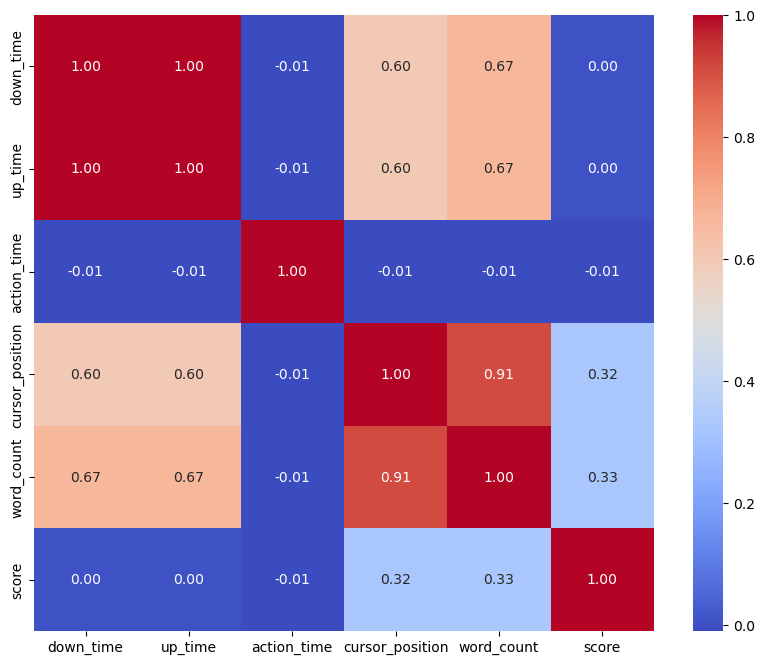

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using the heatmap function to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [20]:
data

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count,score
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0,3.5
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0,3.5
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0,3.5
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1,3.5
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...
8405893,fff05981,3615,2063944,2064440,496,Nonproduction,Leftclick,Leftclick,NoChange,1031,240,4.0
8405894,fff05981,3616,2064497,2064497,0,Nonproduction,Shift,Shift,NoChange,1031,240,4.0
8405895,fff05981,3617,2064657,2064765,108,Replace,q,q,q => q,1031,240,4.0
8405896,fff05981,3618,2069186,2069259,73,Nonproduction,Leftclick,Leftclick,NoChange,1028,240,4.0


In [21]:
data['event_count'] = data.groupby('id')['event_id'].transform('count')

/var/folders/r8/jgtbgld54tz20ynw59v0pnvc0000gn/T/ipykernel_3358/1378306192.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['event_count'] = data.groupby('id')['event_id'].transform('count')


In [28]:
import pandas as pd

def aggregate_data(df, agg_methods):
    # Count of events for each 'id' is likely always needed, so we calculate that first

    # Perform the aggregation using the provided methods
    data_aggregated = df.groupby('id').agg(agg_methods).reset_index()

    # Flatten the MultiIndex columns if necessary
    if isinstance(data_aggregated.columns, pd.MultiIndex):
        data_aggregated.columns = ['_'.join(col).strip() for col in data_aggregated.columns.values]

    return data_aggregated

# Define the aggregation methods outside of the function
aggregation_methods = {
    'down_time': 'sum',
    'up_time': 'sum',
    'action_time': 'sum',
    'cursor_position': 'max',
    'word_count': 'max',
    'score': 'mean',  # You might calculate mean score or sum or any other statistic
    # Add more numeric features if needed
}

# Call the function with the data and the aggregation methods
data_aggregated = aggregate_data(data, aggregation_methods)
print(data_aggregated)

/var/folders/r8/jgtbgld54tz20ynw59v0pnvc0000gn/T/ipykernel_3358/1275094597.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_aggregated = df.groupby('id').agg(agg_methods).reset_index()


            id   down_time     up_time  action_time  cursor_position  \
0     001519c8  2168798234  2169095477       297243             1539   
1     0022f953  1273271023  1273546414       275391             1676   
2     0042269b  3426641982  3427063183       421201             2291   
3     0059420b  1222211589  1222401185       189596             1047   
4     0075873a  1805499474  1805813176       313702             1402   
...        ...         ...         ...          ...              ...   
2466  ffb8c745  3488386746  3488886416       499670             1634   
2467  ffbef7e5  2192480040  2192694261       214221             1877   
2468  ffccd6fd  3764472937  3764704517       231580             2761   
2469  ffec5b38  1869073112  1869362551       289439             2133   
2470  fff05981  3897099261  3897400496       301235             1496   

      word_count  score  
0            256    3.5  
1            323    3.5  
2            404    6.0  
3            206    2.0  
4    

In [29]:
data_aggregated = data_aggregated[data_aggregated.columns[1:]]

/Users/ayushlodha/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/Users/ayushlodha/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

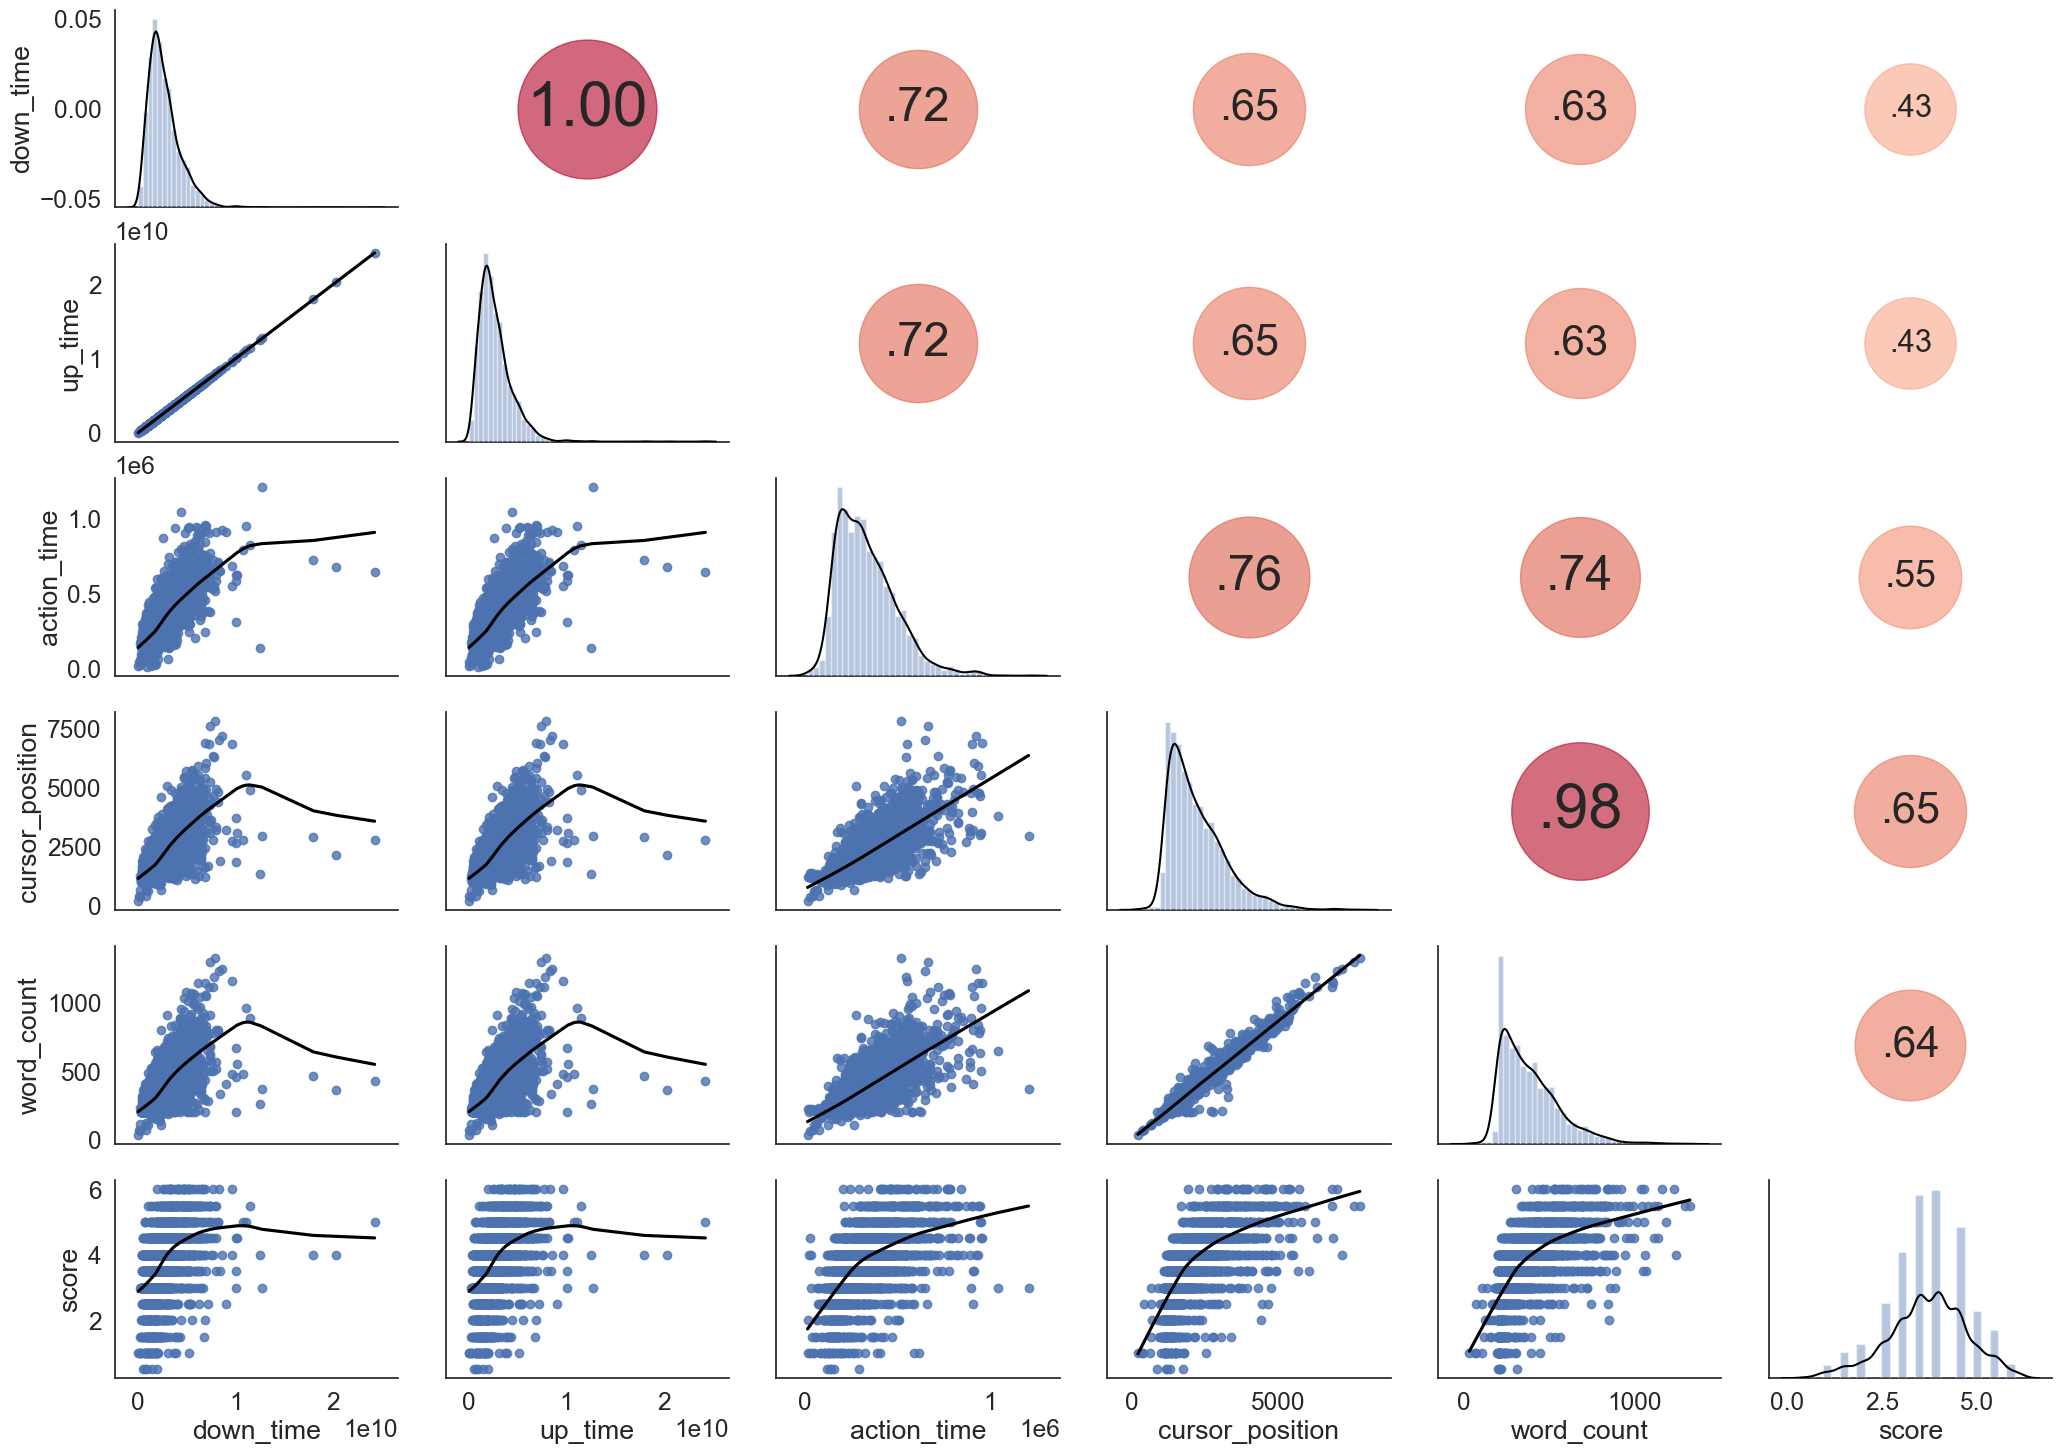

In [30]:
# Ensure this line is there to import necessary packages
import matplotlib.pyplot as plt
import seaborn as sns

# Here's your corrdot function as given
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

# Set the style for the seaborn plots
sns.set(style='white', font_scale=1.6)

# Instead of loading the Iris dataset, we'll use data_aggregated
# Let's assume data_aggregated is your aggregated DataFrame with sums of numeric features and the event_count

# Initialize the PairGrid
g = sns.PairGrid(data_aggregated, aspect=1.4, diag_sharey=False)

# Map the plots to the lower, upper, and diagonal
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

# You could also loop over axes to set labels and titles if needed
# for example, for ax in g.axes.flatten():
#     ax.set_xlabel(ax.get_xlabel(), rotation = 45)
#     ax.set_ylabel(ax.get_ylabel(), rotation = 45)
#     ax.set_title(ax.get_title(), fontsize='medium')

plt.show()